<a href="https://colab.research.google.com/github/Ourumo/ML/blob/main/hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import numpy as np
import sklearn
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

from functools import partial

tf.random.set_seed(42)  # 추가 코드 - 재현성 보장
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.summary()

4422102/4422102 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                           

In [3]:
# 추가 코드 - 모델을 컴파일, 훈련, 평가하고 예측을 만듭니다.
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]  # 새 이미지가 있다고 가정합니다.
y_pred = model.predict(X_new)

Epoch 1/100
1719/1719 [==============================] - 25s 7ms/step - loss: 0.4890 - accuracy: 0.8269 - val_loss: 0.3280 - val_accuracy: 0.8806
Epoch 2/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3136 - accuracy: 0.8874 - val_loss: 0.2619 - val_accuracy: 0.8988
Epoch 3/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2671 - accuracy: 0.9041 - val_loss: 0.2419 - val_accuracy: 0.9104
Epoch 4/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2330 - accuracy: 0.9151 - val_loss: 0.2419 - val_accuracy: 0.9120
Epoch 5/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2078 - accuracy: 0.9232 - val_loss: 0.2155 - val_accuracy: 0.9200
Epoch 6/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1899 - accuracy: 0.9303 - val_loss: 0.2210 - val_accuracy: 0.9196
Epoch 7/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1713 - accuracy: 0.9360 - val_loss: 0.2280 -

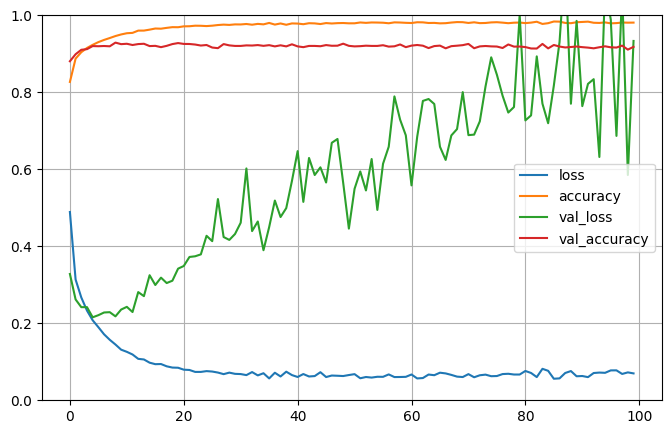

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9851 - accuracy: 0.9192


[0.9851037263870239, 0.9192000031471252]